In [1]:
from matplotlib import  pyplot as plt

%matplotlib inline

x=[5,2,7]
y = [2,16,4]
plt.plot(x,y)#

from matplotlib import  style

style.use("ggplot")

x = [5,8,10]
y = [12,16,6]
x2 = [6,9,11]
y2 = [6,15,7]
plt.plot(x,y,'g',label='line one', linewidth=5)
plt.plot(x2,y2,'r',label='line two',linewidth=5)
plt.title('Epic Info')
plt.ylabel('Y axis')
plt.xlabel('X axis')#设置图例位置plt.legend()plt.grid(True,color='k')plt.show()

In [11]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [14]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x, np.sin(x+i*.5)*(7-i)*flip)

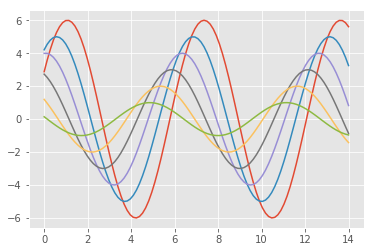

In [15]:
sinplot()

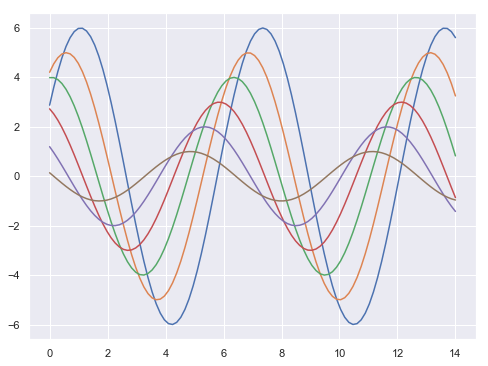

In [17]:
sns.set()
fig = plt.figure(figsize=(8,6))
sinplot()

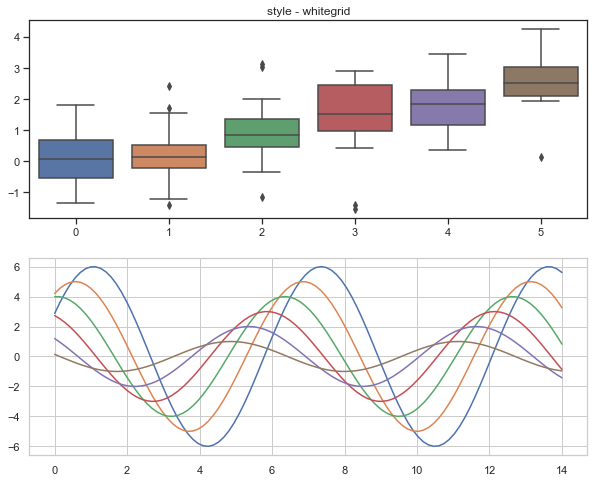

In [20]:
#set_style()
# 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"

fig = plt.figure(figsize=(10,8),facecolor = 'white')

ax1 = fig.add_subplot(2,1,1)                 
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)
plt.title('style - whitegrid')

ax2 = fig.add_subplot(2,1,2)    
sns.set_style("dark")
sns.set_style("ticks")
sinplot()

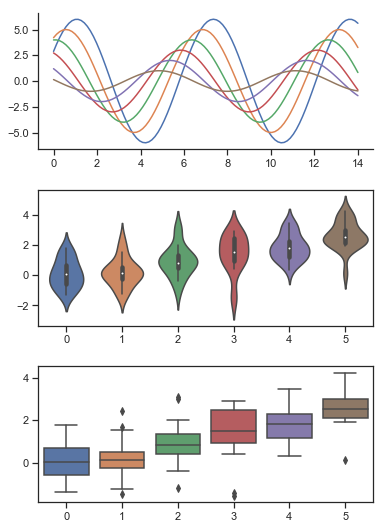

In [29]:
sns.set_style("ticks")
fig = plt.figure(figsize=(6,9))
plt.subplots_adjust(hspace=0.3)
ax1 = fig.add_subplot(3,1,1)
sinplot()
sns.despine()
ax2 = fig.add_subplot(3,1,2)
sns.violinplot(data=data)
ax3 = fig.add_subplot(3,1,3)
sns.boxplot(data=data,palette="deep")

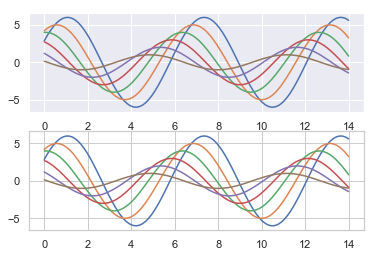

In [30]:
# axes_style()
# 与with配合的用法

with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
# 设置局部图表风格，用with做代码块区分

sns.set_style("whitegrid")
plt.subplot(212)
sinplot()
# 外部表格风格

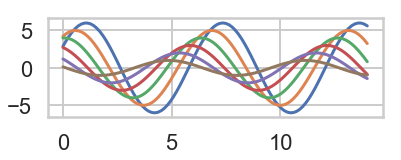

In [31]:
sns.set_style("whitegrid")
sns.set_context("poster")
plt.subplot(212)
sinplot()

<class 'seaborn.palettes._ColorPalette'>


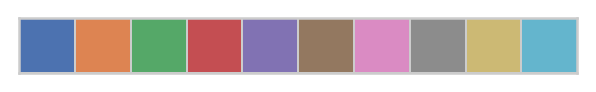

In [32]:
current_palette = sns.color_palette()
print(type(current_palette))

#sns.palplot(current_palette[2:4])
sns.palplot(current_palette)

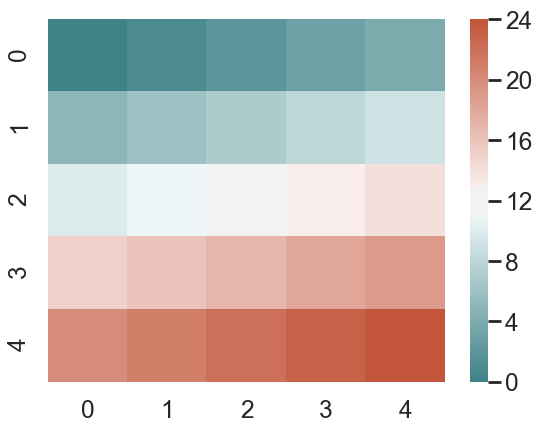

In [37]:
#diverging_palette()

plt.figure(figsize = (8,6),dpi=80)
x = np.arange(25).reshape(5, 5)
# 创建分散颜色
cmap = sns.diverging_palette(200, 20, sep=20, as_cmap=True)

sns.heatmap(x, cmap=cmap)

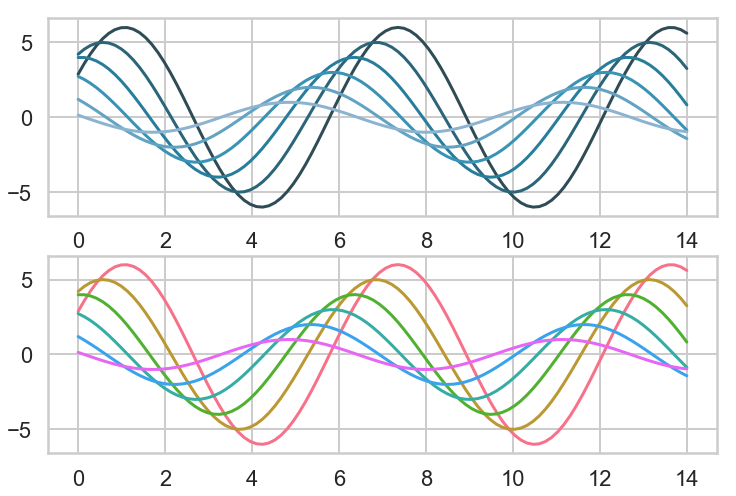

In [38]:
sns.set_style("whitegrid")
# 设置风格
fig = plt.figure(figsize=(12,8))
with sns.color_palette("PuBuGn_d"):
    plt.subplot(211)
    sinplot()

sns.set_palette("husl")
plt.subplot(212)
sinplot()

In [40]:
# 全局设置
sns.set_style("darkgrid")
sns.set_context("paper")

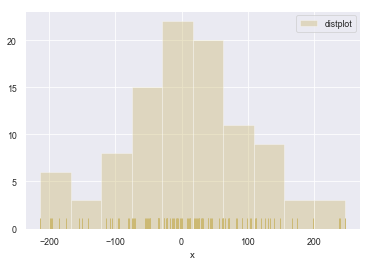

In [41]:
# 直方图 - distplot()

rs = np.random.RandomState(10)  # 设定随机数种子
s = pd.Series(rs.randn(100) * 100)
sns.distplot(s,bins = 10,hist = True,kde = False,norm_hist=False,
            rug = True,vertical = False,
            color = 'y',label = 'distplot',axlabel = 'x')
plt.legend()
# bins → 箱数
# hist、ked → 是否显示箱/密度曲线
# norm_hist → 直方图是否按照密度来显示
# rug → 是否显示数据分布情况
# vertical → 是否水平显示
# color → 设置颜色
# label → 图例
# axlabel → x轴标注

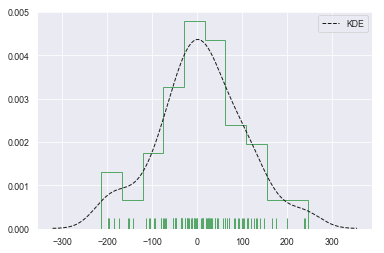

In [42]:
# 颜色详细设置

sns.distplot(s,rug = True, 
            rug_kws = {'color':'g'} ,   
            # 设置数据频率分布颜色
            kde_kws={"color": "k", "lw": 1, "label": "KDE",'linestyle':'--'},   
            # 设置密度曲线颜色，线宽，标注、线形
            hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "g"})  
            # 设置箱子的风格、线宽、透明度、颜色
            # 风格包括：'bar', 'barstacked', 'step', 'stepfilled'

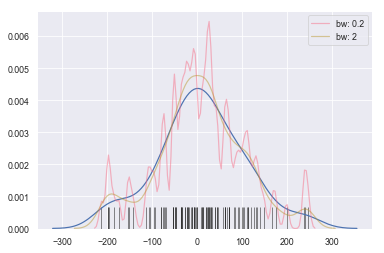

In [43]:
# 密度图 - kdeplot()
# 单个样本数据密度分布图

sns.kdeplot(s,
           shade = False,  # 是否填充
           color = 'b',   # 设置颜色
           vertical = False  # 设置是否水平
           )

sns.kdeplot(s,bw=5, label="bw: 0.2",
            linestyle = '-',linewidth = 1.2,alpha = 0.5)

sns.kdeplot(s,bw=20, label="bw: 2",
            linestyle = '-',linewidth = 1.2,alpha = 0.5)
# bw → 控制拟合的程度，类似直方图的箱数

sns.rugplot(s,height = 0.1,color = 'k',alpha = 0.5)
# 数据频率分布图

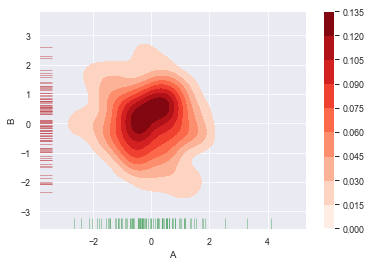

In [44]:
# 密度图 - kdeplot()
# 两个样本数据密度分布图

rs = np.random.RandomState(2)  # 设定随机数种子
df = pd.DataFrame(rs.randn(100,2),
                 columns = ['A','B'])
sns.kdeplot(df['A'],df['B'],
           cbar = True,    # 是否显示颜色图例
           shade = True,   # 是否填充
           cmap = 'Reds',  # 设置调色盘
           shade_lowest=False,  # 最外围颜色是否显示
           n_levels = 10   # 曲线个数（如果非常多，则会越平滑）
           )
# 两个维度数据生成曲线密度图，以颜色作为密度衰减显示

sns.rugplot(df['A'], color="g", axis='x',alpha = 0.5)
sns.rugplot(df['B'], color="r", axis='y',alpha = 0.5)
# 注意设置x，y轴

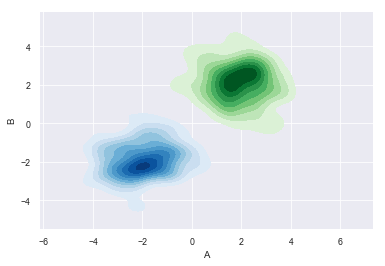

In [45]:
# 密度图 - kdeplot()
# 两个样本数据密度分布图
# 多个密度图

rs1 = np.random.RandomState(2)  
rs2 = np.random.RandomState(5)  
df1 = pd.DataFrame(rs1.randn(100,2)+2,columns = ['A','B'])
df2 = pd.DataFrame(rs2.randn(100,2)-2,columns = ['A','B'])
# 创建数据

sns.kdeplot(df1['A'],df1['B'],cmap = 'Greens',
            shade = True,shade_lowest=False)
sns.kdeplot(df2['A'],df2['B'],cmap = 'Blues',
            shade = True,shade_lowest=False)
# 创建图表
#sns.rugplot(df2['A']+df1['A'], color="g", axis='x',alpha = 0.5)
#sns.rugplot(df2['B']+df1['B'], color="r", axis='y',alpha = 0.5)

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


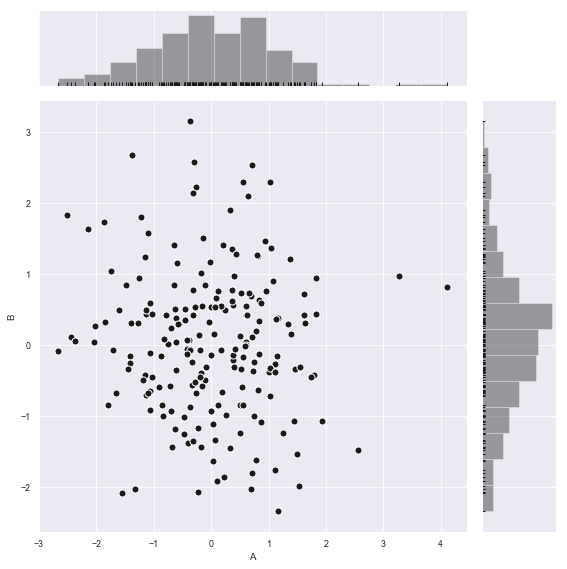

In [46]:
# 综合散点图 - jointplot()
# 散点图 + 分布图

rs = np.random.RandomState(2)  
df = pd.DataFrame(rs.randn(200,2),columns = ['A','B'])


sns.jointplot(x=df['A'], y=df['B'],  # 设置xy轴，显示columns名称
              data=df,   # 设置数据
              color = 'k',   # 设置颜色
              s = 50, edgecolor="w",linewidth=1,  # 设置散点大小、边缘线颜色及宽度(只针对scatter）
              kind = 'scatter',   # 设置类型：“scatter”、“reg”、“resid”、“kde”、“hex”
              space = 0.2,  # 设置散点图和布局图的间距
              size = 8,   # 图表大小（自动调整为正方形）
              ratio = 5,  # 散点图与布局图高度比，整型
              marginal_kws=dict(bins=15, rug=True)  # 设置柱状图箱数，是否设置rug
              ) 

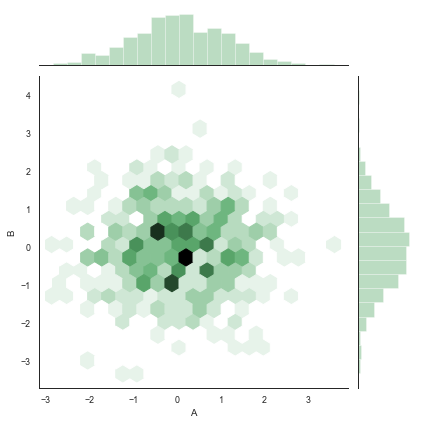

In [50]:
# 综合散点图 - jointplot()
# 散点图 + 分布图
# 六边形图

df = pd.DataFrame(rs.randn(500,2),columns = ['A','B'])


with sns.axes_style("white"):
    sns.jointplot(x=df['A'], y=df['B'],data = df, kind="hex", color="g",
                 marginal_kws=dict(bins=20))

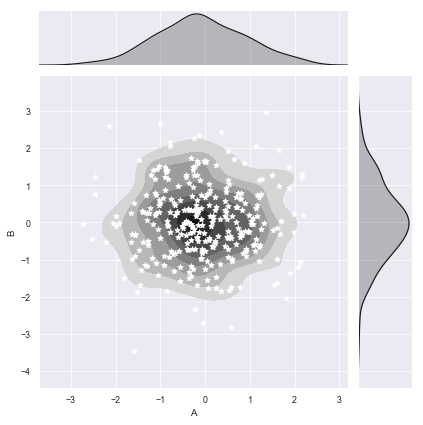

In [51]:
# 综合散点图 - jointplot()
# 散点图 + 分布图
# 密度图

rs = np.random.RandomState(15)
df = pd.DataFrame(rs.randn(300,2),columns = ['A','B'])
# 创建数据

g = sns.jointplot(x=df['A'], y=df['B'],data = df,
                  kind="kde", color="k",
                  shade_lowest=False)
# 创建密度图

g.plot_joint(plt.scatter,c="w", s=30, linewidth=1, marker="*")
# 添加散点图

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


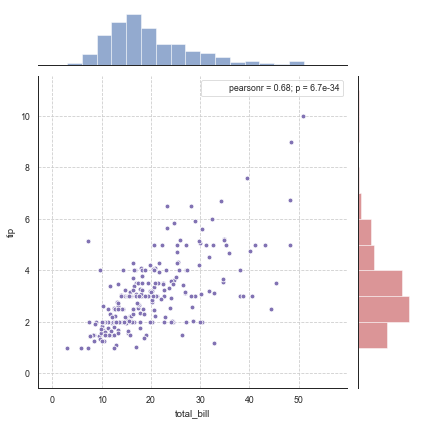

In [52]:
# 综合散点图 - JointGrid()
# 可拆分绘制的散点图
# plot_joint() + ax_marg_x.hist() + ax_marg_y.hist()

sns.set_style("white")
# 设置风格

tips = sns.load_dataset("tips")
print(tips.head())
# 导入数据

g = sns.JointGrid(x="total_bill", y="tip", data=tips)
# 创建一个绘图表格区域，设置好x、y对应数据

g.plot_joint(plt.scatter, color ='m', edgecolor = 'white')  # 设置框内图表，scatter
g.ax_marg_x.hist(tips["total_bill"], color="b", alpha=.6,
                 bins=np.arange(0, 60, 3))            # 设置x轴直方图，注意bins是数组
g.ax_marg_y.hist(tips["tip"], color="r", alpha=.6,
                 orientation="horizontal",
                 bins=np.arange(0, 12, 1))            # 设置x轴直方图，注意需要orientation参数

from scipy import stats
g.annotate(stats.pearsonr)    
# 设置标注，可以为pearsonr，spearmanr

plt.grid(linestyle = '--')

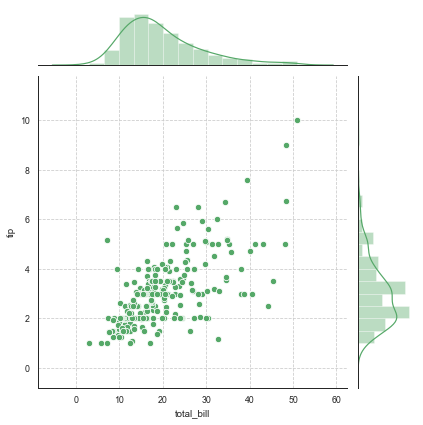

In [53]:
# 综合散点图 - JointGrid()
# 可拆分绘制的散点图
# plot_joint() + plot_marginals()

g = sns.JointGrid(x="total_bill", y="tip", data=tips)
# 创建一个绘图表格区域，设置好x、y对应数据

g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")   # 绘制散点图
plt.grid(linestyle = '--')

g.plot_marginals(sns.distplot, kde=True, color="g")                # 绘制x，y轴直方图

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


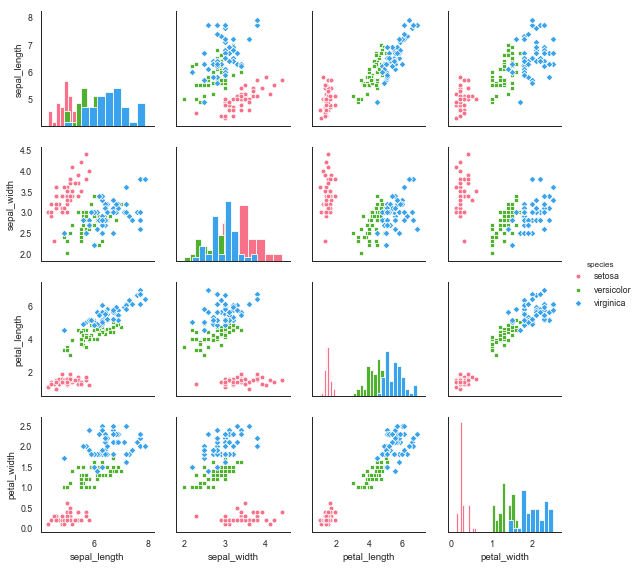

In [54]:
# 矩阵散点图 - pairplot()

sns.set_style("white")
# 设置风格

iris = sns.load_dataset("iris")
print(iris.head())
# 读取数据

sns.pairplot(iris,
            kind = 'scatter',  # 散点图/回归分布图 {‘scatter’, ‘reg’}  
            diag_kind="hist",  # 直方图/密度图 {‘hist’, ‘kde’}
            hue="species",   # 按照某一字段进行分类
            palette="husl",  # 设置调色板
            markers=["o", "s", "D"],  # 设置不同系列的点样式（这里根据参考分类个数）
            size = 2,   # 图表大小
            )

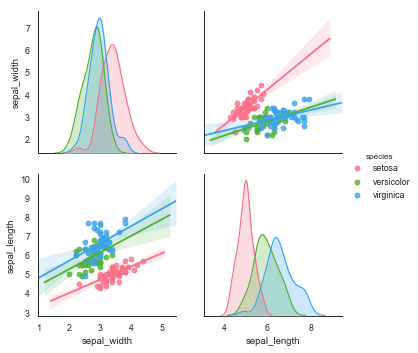

In [55]:
sns.pairplot(iris,vars=["sepal_width", "sepal_length"],
             kind = 'reg', diag_kind="kde", 
             hue="species", palette="husl")

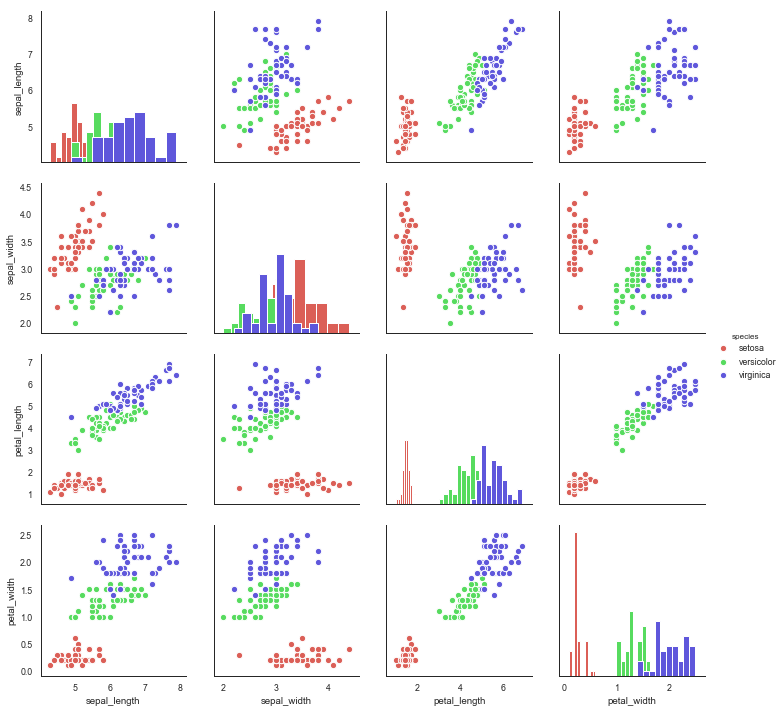

In [56]:
#  矩阵散点图 - PairGrid()
# 可拆分绘制的散点图
# map_diag() + map_offdiag()

g = sns.PairGrid(iris,hue="species",palette = 'hls',
                vars = ['sepal_length','sepal_width','petal_length','petal_width'],  # 可筛选
                )
# 创建一个绘图表格区域，设置好x、y对应数据，按照species分类

g.map_diag(plt.hist, 
           histtype = 'barstacked',   # 可选：'bar', 'barstacked', 'step', 'stepfilled'
           linewidth = 1, edgecolor = 'w')           
# 对角线图表，plt.hist/sns.kdeplot

g.map_offdiag(plt.scatter,
              edgecolor="w", s=40,linewidth = 1,   # 设置点颜色、大小、描边宽度
             )     
# 其他图表，plt.scatter/plt.bar...

g.add_legend()

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
40   23.9     9.082    9.799          22.944       19.359       858.97   
34   23.9     5.497   10.038          23.661       20.554       688.75   
48   23.8     8.092    6.664          23.086       20.706       992.61   
3    22.4     4.032    5.824          21.056       21.280       827.34   
17   21.4     4.066    4.922          16.692       16.264       872.51   

    ins_losses abbrev  
40      116.29     SC  
34      109.72     ND  
48      152.56     WV  
3       142.39     AR  
17      137.13     KY  


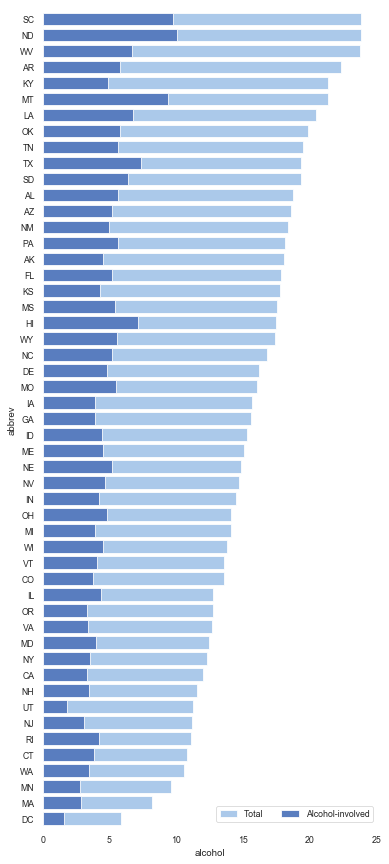

In [57]:
# 1、barplot()
# 柱状图 - 置信区间估计

crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
print(crashes.head())
# 加载数据

f, ax = plt.subplots(figsize=(6, 15))
# 创建图表

sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b",edgecolor = 'w')
# 设置第一个柱状图

sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b",edgecolor = 'w')
# 设置第二个柱状图

ax.legend(ncol=2, loc="lower right")
sns.despine(left=True, bottom=True)

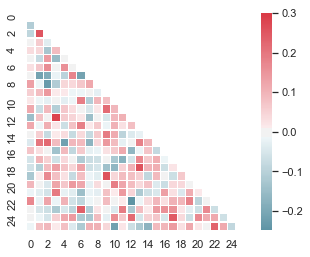

In [59]:
#  heatmap()
# 绘制半边热图

sns.set(style="white")
# 设置风格

rs = np.random.RandomState(33)
d = pd.DataFrame(rs.normal(size=(100, 26)))
corr = d.corr()   # 求解相关性矩阵表格
# 创建数据

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 设置一个“上三角形”蒙版

cmap = sns.diverging_palette(220, 10, as_cmap=True)
# 设置调色盘

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.2)
# 生成半边热图